In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/netflix1.csv")

In [ ]:
df.head(5)

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [ ]:
df.rename(columns={"listed_in":"category"},inplace=True)

In [ ]:
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,category
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [ ]:
df.describe()

,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [ ]:
df.shape

(8790, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   category      8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [ ]:
df.duplicated().value_counts()

False    8790
dtype: int64

In [ ]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
category        0
dtype: int64

In [ ]:
df["type"].nunique()

2

In [ ]:
df["type"].unique()

array(['Movie', 'TV Show'], dtype=object)

In [ ]:
df["type"] = df["type"].replace("TV Show", "Series")

In [ ]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'category'],
      dtype='object')

In [ ]:
# Unique values of various columns
cols = ["type", "country", "rating","director"]
for col in cols:
    print(df[col].value_counts(), "\n")

Movie     6126
Series    2664
Name: type, dtype: int64 

United States     3240
India             1057
United Kingdom     638
Pakistan           421
Not Given          287
                  ... 
Iran                 1
West Germany         1
Greece               1
Zimbabwe             1
Soviet Union         1
Name: country, Length: 86, dtype: int64 

TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: rating, dtype: int64 

Not Given                         2588
Rajiv Chilaka                       20
Alastair Fothergill                 18
Raúl Campos, Jan Suter              18
Suhas Kadav                         16
                                  ... 
Matt D'Avella                        1
Parthiban                            1
Scott McAboy                         1
Raymie Muzquiz, Stu Livingston

In [ ]:
# Movies and series from the not given directors
df[df.director == "Not Given"]

,show_id,type,title,director,country,date_added,release_year,rating,duration,category
12,s852,Movie,99 Songs (Tamil),Not Given,Pakistan,5/21/2021,2021,TV-14,131 min,"Dramas, International Movies, Music & Musicals"
17,s4,Series,Jailbirds New Orleans,Not Given,Pakistan,9/24/2021,2021,TV-MA,1 Season,"Docuseries, Reality TV"
18,s15,Series,Crime Stories: India Detectives,Not Given,Pakistan,9/22/2021,2021,TV-MA,1 Season,"British TV Shows, Crime TV Shows, Docuseries"
33,s20,Series,Jaguar,Not Given,Pakistan,9/22/2021,2021,TV-MA,1 Season,"International TV Shows, Spanish-Language TV Sh..."
34,s32,Series,Chicago Party Aunt,Not Given,Pakistan,9/17/2021,2021,TV-MA,1 Season,TV Comedies
...,...,...,...,...,...,...,...,...,...,...
8785,s8797,Series,Yunus Emre,Not Given,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,Series,Zak Storm,Not Given,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,Series,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,Series,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV


In [ ]:
# Movies and series from the not given countries
df[df.country == "Not Given"]

,show_id,type,title,director,country,date_added,release_year,rating,duration,category
23,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha",Not Given,9/24/2021,2021,PG,91 min,Children & Family Movies
24,s12,Series,Bangkok Breaking,Kongkiat Komesiri,Not Given,9/23/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
25,s17,Movie,Europe's Most Dangerous Man: Otto Skorzeny in ...,"Pedro de Echave García, Pablo Azorín Williams",Not Given,9/22/2021,2020,TV-MA,67 min,"Documentaries, International Movies"
26,s7930,Movie,Samudri Lootere,Anirban Majumder,Not Given,6/18/2019,2018,TV-Y,65 min,Children & Family Movies
52,s19,Movie,Intrusion,Adam Salky,Not Given,9/22/2021,2021,TV-14,94 min,Thrillers
...,...,...,...,...,...,...,...,...,...,...
6005,s8161,Movie,Teenage Mutant Ninja Turtles: The Movie,Steve Barron,Not Given,1/1/2020,1990,PG,94 min,"Action & Adventure, Comedies"
6257,s8451,Movie,The Perfect Day,Jean-Pierre Devillers,Not Given,9/1/2018,2018,TV-14,93 min,"Documentaries, International Movies, Sports Mo..."
6366,s8603,Movie,Tom and Jerry: The Magic Ring,Phil Roman,Not Given,12/15/2019,2001,TV-Y7,60 min,"Children & Family Movies, Comedies"
6468,s8719,Movie,Westside vs. the World,Michael Fahey,Not Given,8/9/2019,2019,TV-MA,96 min,"Documentaries, Sports Movies"


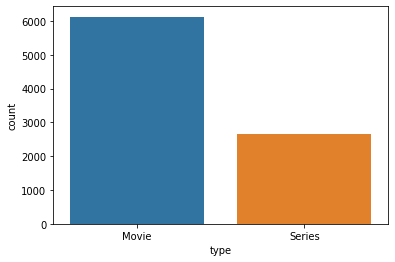

In [ ]:
sns.countplot(data=df , x="type");

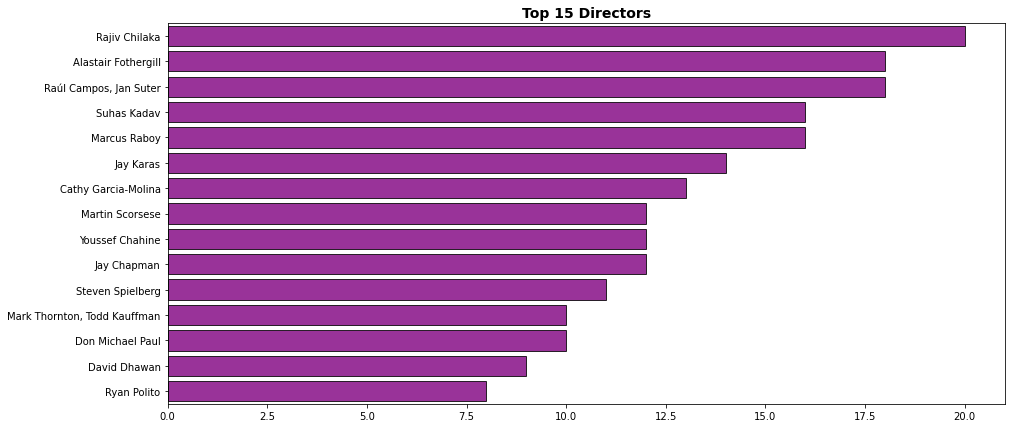

In [ ]:
plt.figure(figsize = (15,7))
top_15 = df['director'].value_counts().drop('Not Given').head(15)
sns.barplot(x = top_15.values, y  = top_15.index , edgecolor = 'k', linewidth = 1, saturation = 1, color = 'purple', alpha =0.8)

plt.title("Top 15 Directors", fontsize = 14, fontweight = 'heavy')
plt.show()

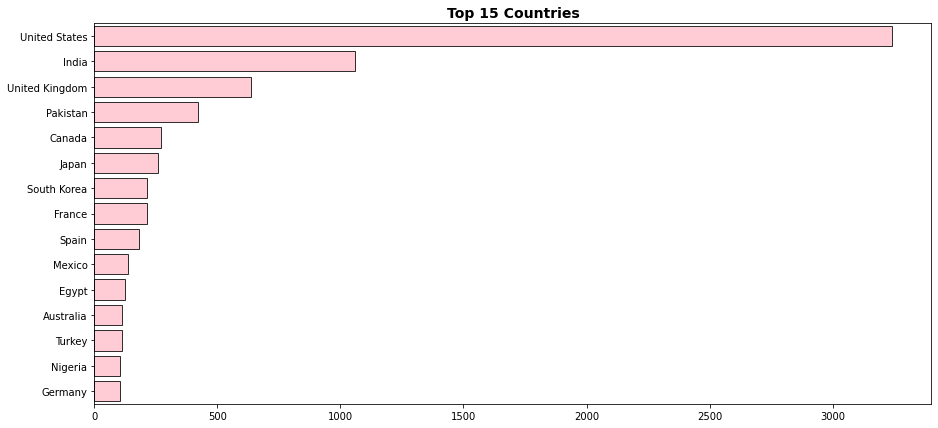

In [ ]:
plt.figure(figsize = (15,7))
top_15 = df['country'].value_counts().drop('Not Given').head(15)
sns.barplot(x = top_15.values, y  = top_15.index , edgecolor = 'k', linewidth = 1, saturation = 1, color = 'pink', alpha =0.8)

plt.title("Top 15 Countries", fontsize = 14, fontweight = 'heavy')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


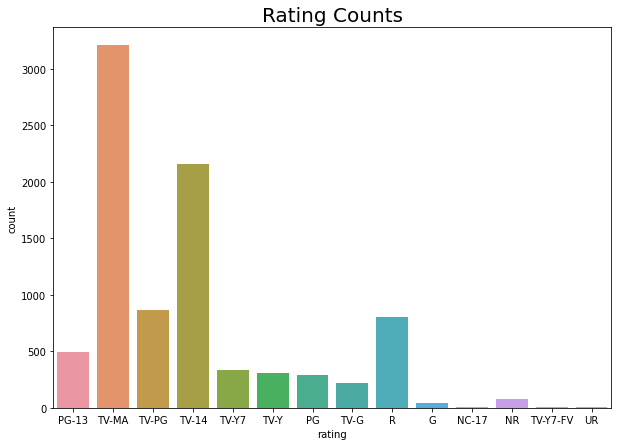

In [ ]:
# The number of different shows and their value counts
plt.figure(figsize=(10,7))
sns.countplot(df["rating"])
plt.title("Rating Counts", fontsize=20)
plt.show();

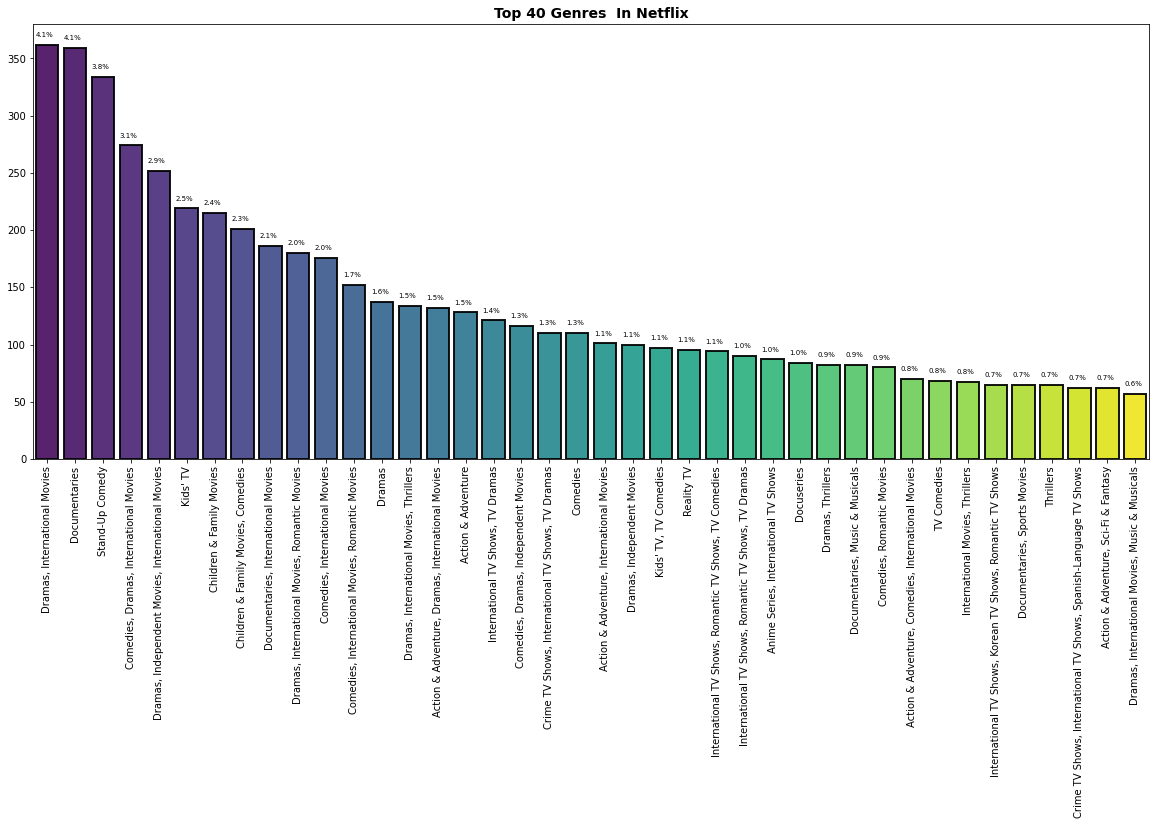

In [ ]:
plt.figure(figsize = (20,8))
df_c = df['category'].value_counts().head(40)
count = sns.barplot(x = df_c.index, y=df_c.values , alpha = 0.9, saturation = 1  , edgecolor = 'k', linewidth = 2, palette = "viridis")
for p in count.patches:
    per = round( (p.get_height()/df.shape[0])*100 ,1 )
    x = p.get_x()
    y = p.get_height() +7
    count.annotate('{0}%'.format(per), (x, y ), fontsize = 7)

plt.xticks(rotation = 90)
plt.title('Top 40 Genres  In Netflix', fontsize = 14, fontweight = 'heavy')
plt.show()

Text(0.5, 1.0, 'Release Years')

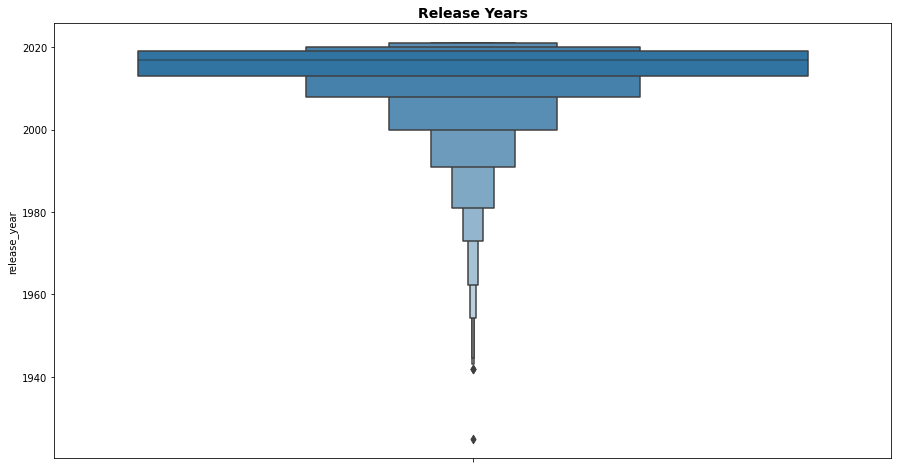

In [ ]:
plt.figure(figsize = (15,8))
sns.boxenplot(y = df['release_year'])
plt.title("Release Years", fontsize = 14, fontweight = 'heavy')

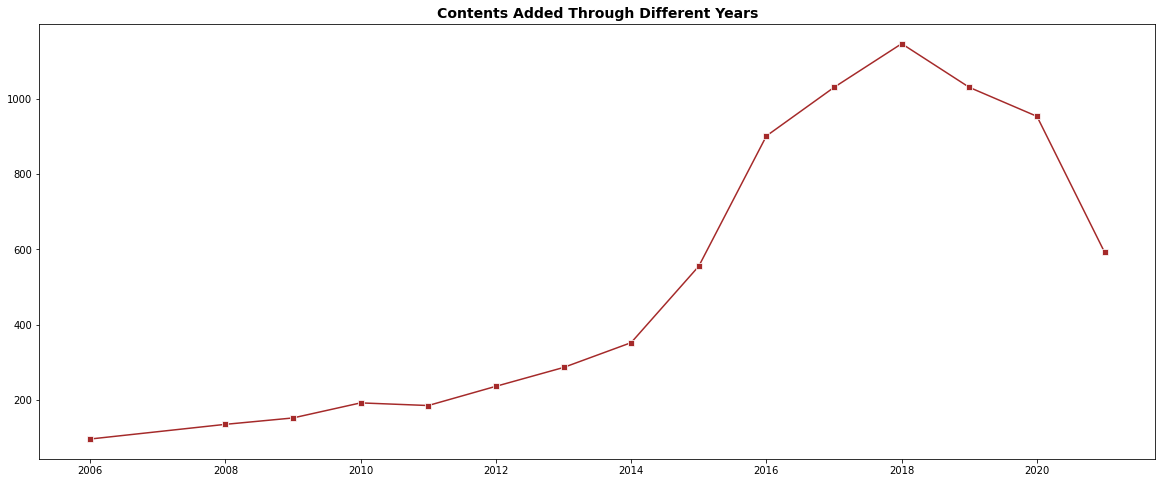

In [ ]:
plt.figure(figsize = (20,8))
sns.lineplot(x = df['release_year'].value_counts().head(15).index , y = df['release_year'].value_counts().head(15).values, alpha = 1, color = "brown", marker='s')
plt.title('Contents Added Through Different Years', fontsize = 14, fontweight = 'heavy')
plt.show()

##DATASET SUMMARY
Top 3 Categories are

1)Dramas, International Movies

2)Documentaries

3)Stand-up Comedies



Movie rate is higher than series. (Movie -> 6126 , Series -> 2664)

United States has the largest number of shows